# Biomed Data Analyst Training Program - Chapter 4 
 Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Check the errata at (https://gedeck.github.io/mistat-code-solutions/ModernStatistics/) and the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues to see if the issue is known and a solution available.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as sms
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import matplotlib.pyplot as plt

import mistat

# Variability in Several Dimensions and Regression Models

To demonstrate the topics of this chapter, we use the dataset `Assay stability test.csv`. 

First load the data:

In [3]:
assayStability = pd.read_csv('Assay stability test.csv')
assayStability.head()

,Condition,Month,Data
0,Up,3,0.1029
1,Up,3,0.0960
2,Up,3,0.1040
3,Up,3,0.1058
4,Up,3,0.1038


### Multiple Box-Plots

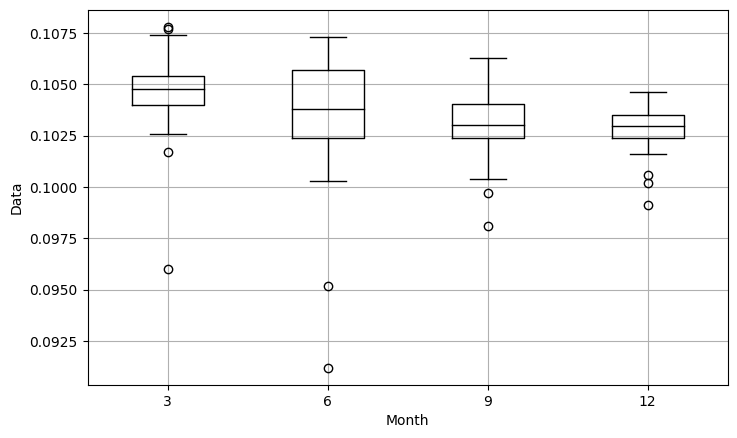

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
assayStability.boxplot(column='Data', by='Month', color='black', ax=ax)
ax.set_title('')
ax.get_figure().suptitle('')
ax.set_xlabel('Month')
ax.set_ylabel('Data')
plt.show()


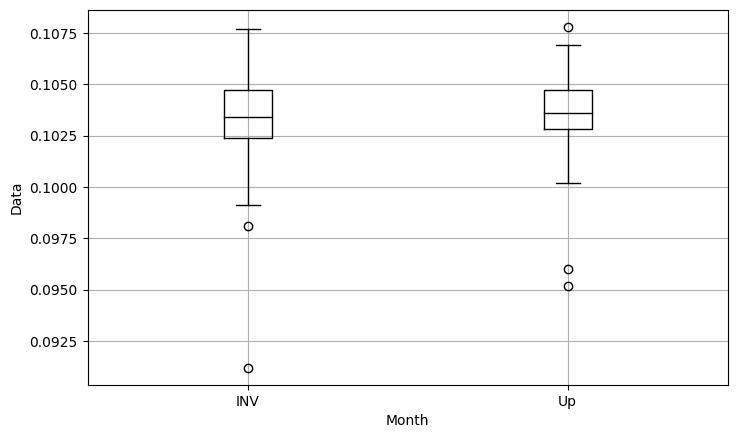

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
assayStability.boxplot(column='Data', by='Condition', color='black', ax=ax)
ax.set_title('')
ax.get_figure().suptitle('')
ax.set_xlabel('Month')
ax.set_ylabel('Data')
plt.show()


## Frequency Distributions in Several Dimensions

### Bivariate Joint Frequency Distributions

In [13]:
binned_data = pd.DataFrame({
    'Condition': assayStability['Condition'],
    'Month': assayStability['Month'],
    'Data': pd.cut(assayStability['Data'], bins=6)
})
join_frequencies = pd.crosstab(binned_data['Data'],
                               binned_data['Condition'])
print(join_frequencies)

join_frequencies = pd.crosstab(binned_data['Data'],
                               binned_data['Month'])
print(join_frequencies)

Condition         INV  Up
Data                     
(0.0912, 0.094]     1   0
(0.094, 0.0967]     0   2
(0.0967, 0.0995]    2   0
(0.0995, 0.102]    20  12
(0.102, 0.105]     72  81
(0.105, 0.108]     25  25
Month             3   6   9   12
Data                            
(0.0912, 0.094]    0   1   0   0
(0.094, 0.0967]    1   1   0   0
(0.0967, 0.0995]   0   0   1   1
(0.0995, 0.102]    1   8  10  13
(0.102, 0.105]    36  30  41  46
(0.105, 0.108]    22  20   8   0


In [14]:
print('Row Totals', join_frequencies.sum(axis=1))
print('Column Totals', join_frequencies.sum(axis=0))

Row Totals Data
(0.0912, 0.094]       1
(0.094, 0.0967]       2
(0.0967, 0.0995]      2
(0.0995, 0.102]      32
(0.102, 0.105]      153
(0.105, 0.108]       50
dtype: int64
Column Totals Month
3     60
6     60
9     60
12    60
dtype: int64


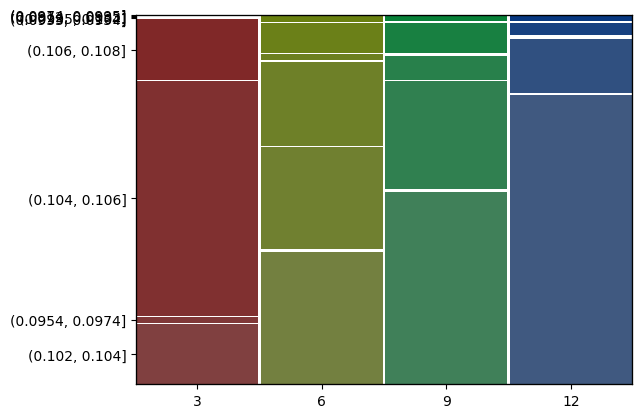

In [23]:
binned_data = pd.DataFrame({
    'Condition': assayStability['Condition'],
    'Month': assayStability['Month'],
    'Data': pd.cut(assayStability['Data'], bins=8)
})

mosaic(binned_data, ['Month', 'Data'], labelizer=lambda x: '')
plt.show()

### Conditional Distributions

In [14]:
hadpas = mistat.load_data('HADPAS')
binned_hadpas = pd.DataFrame({
  'res3': pd.cut(hadpas['res3'], bins=np.arange(1500, 2700, 200)),
  'res7': pd.cut(hadpas['res7'], bins=np.arange(1300, 2500, 200)),
})
res3_res7 = pd.crosstab(binned_hadpas['res3'], binned_hadpas['res7'])
cond_dist = 100 * res3_res7 / res3_res7.sum(axis=0)

## Correlation and Regression Analysis

### Covariances and Correlations

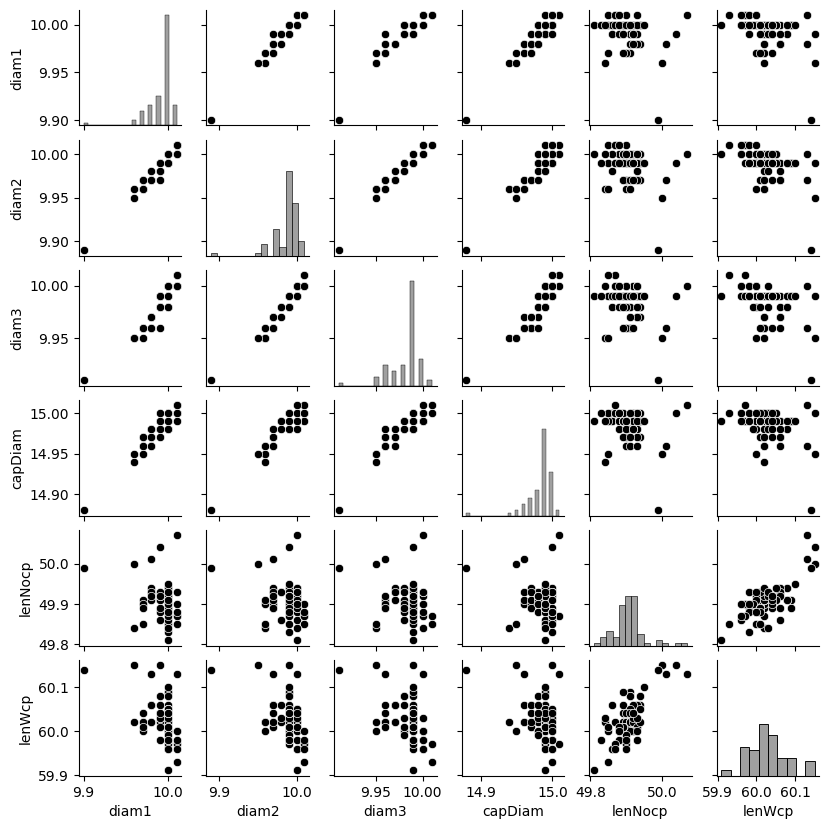

In [15]:
almpin = mistat.load_data('ALMPIN') 
sns.pairplot(almpin, plot_kws={'color': 'black'}, diag_kws={'color': 'grey'}, height=1.4)
plt.show()

### Fitting Simple Regression Lines to Data

#### The Least Squares Method

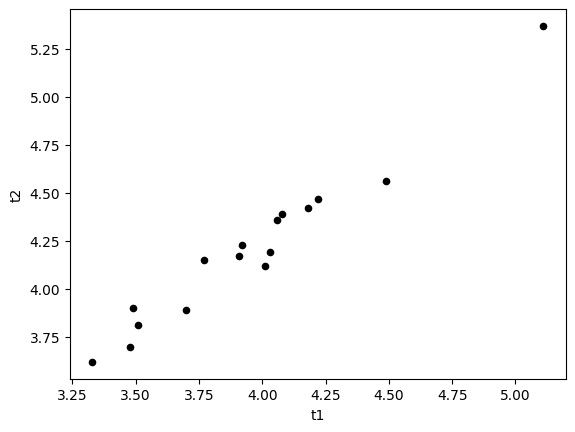

In [16]:
socell = mistat.load_data('SOCELL')
socell.plot.scatter(x='t1', y='t2', color='black')
plt.show()

In [17]:
# ignore UserWarning for Kurtosis-test due to small dataset
import warnings
warnings.simplefilter('ignore', category=UserWarning)

In [18]:
socell = mistat.load_data('SOCELL')
model = smf.ols(formula='t2 ~ 1 + t1', data=socell).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.957    
Dependent Variable: t2               AIC:                -30.8366 
Date:               2023-01-07 14:32 BIC:                -29.2914 
No. Observations:   16               Log-Likelihood:     17.418   
Df Model:           1                F-statistic:        330.8    
Df Residuals:       14               Prob (F-statistic): 3.88e-11 
R-squared:          0.959            Scale:              0.0075846
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     0.5358     0.2031    2.6375   0.0195   0.1001   0.9715
t1            0.9287     0.0511   18.1890   0.0000   0.8192   1.0382
------------------------------------------------------------------
Omnibus:              1.065         Durbin-Watson:           2.021
Pro

In [19]:
# restore default setting
warnings.simplefilter('default', category=UserWarning)

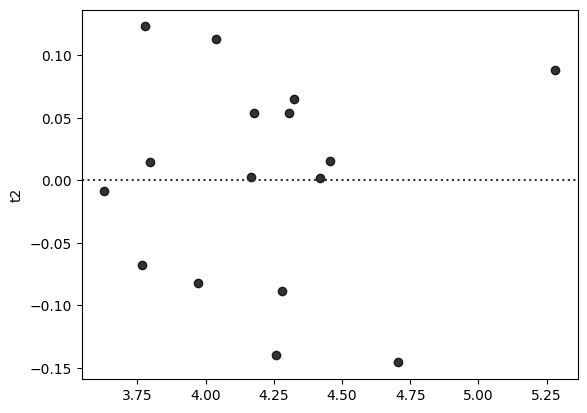

In [20]:
sns.residplot(x=model.predict(socell), y=socell['t2'], lowess=False, color='black')
plt.show()

#### Regression and Prediction Intervals

In [21]:
result = model.get_prediction(pd.DataFrame({'t1': [4.0,4.4,4.8,5.2]}))
columns = ['mean', 'obs_ci_lower', 'obs_ci_upper']
print(0.01)
print(result.summary_frame(alpha=0.01)[columns].round(3))
print(0.05)
print(result.summary_frame(alpha=0.05)[columns].round(3))

0.01
    mean  obs_ci_lower  obs_ci_upper
0  4.251         3.983         4.518
1  4.622         4.346         4.898
2  4.994         4.697         5.290
3  5.365         5.038         5.692
0.05
    mean  obs_ci_lower  obs_ci_upper
0  4.251         4.058         4.443
1  4.622         4.423         4.821
2  4.994         4.780         5.207
3  5.365         5.129         5.601


In [22]:
result = model.get_prediction(pd.DataFrame({'t1': [4.0,4.4,4.8,5.2]}))
print(str(result.summary_frame(alpha=0.01)).replace('\\', '\\\\'))

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \\
0  4.250586  0.021890       4.185423       4.315749      3.983269   
1  4.622066  0.031446       4.528458       4.715675      4.346432   
2  4.993547  0.048298       4.849771       5.137323      4.697095   
3  5.365027  0.067163       5.165095       5.564960      5.037636   

   obs_ci_upper  
0      4.517903  
1      4.897701  
2      5.289998  
3      5.692418  


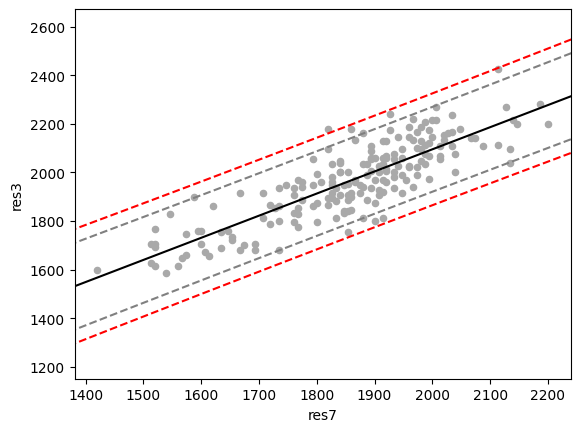

In [23]:
hadpas = mistat.load_data('HADPAS')
ax = hadpas.plot.scatter(x='res7', y='res3', color='darkgrey')

model = smf.ols(formula='res3 ~ 1 + res7', data=hadpas).fit()
sm.graphics.abline_plot(model_results=model, ax=ax, color='black')

newdata = pd.DataFrame({'res7': np.linspace(1300, 2300, 200)})
predictions = model.get_prediction(newdata)
predIntervals = predictions.summary_frame(alpha=0.05)
ax.plot(newdata['res7'], predIntervals['obs_ci_upper'], color='grey', linestyle='--')
ax.plot(newdata['res7'], predIntervals['obs_ci_lower'], color='grey', linestyle='--')
predIntervals = predictions.summary_frame(alpha=0.01)
ax.plot(newdata['res7'], predIntervals['obs_ci_upper'], color='red', linestyle='--')
ax.plot(newdata['res7'], predIntervals['obs_ci_lower'], color='red', linestyle='--')
plt.show()

## Multiple Regression

### Regression on Two Variables

In [24]:
gasol = mistat.load_data('GASOL')
# rename column 'yield' to 'Yield' as 'yield' is a special keyword in Python
gasol = gasol.rename(columns={'yield': 'Yield'})
model = smf.ols(formula='Yield ~ astm + endPt + 1', data=gasol).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.949   
Dependent Variable: Yield            AIC:                150.3690
Date:               2023-01-07 14:32 BIC:                154.7662
No. Observations:   32               Log-Likelihood:     -72.184 
Df Model:           2                F-statistic:        288.4   
Df Residuals:       29               Prob (F-statistic): 7.26e-20
R-squared:          0.952            Scale:              5.8832  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    18.4676    3.0090    6.1374  0.0000  12.3135  24.6217
astm         -0.2093    0.0127  -16.4349  0.0000  -0.2354  -0.1833
endPt         0.1558    0.0069   22.7308  0.0000   0.1418   0.1698
-----------------------------------------------------------------
Omnibus:             

In [25]:
# Covariance
gasol[['astm', 'endPt', 'Yield']].cov()
# Means
gasol[['astm', 'endPt', 'Yield']].mean()

astm     241.500000
endPt    332.093750
Yield     19.659375
dtype: float64

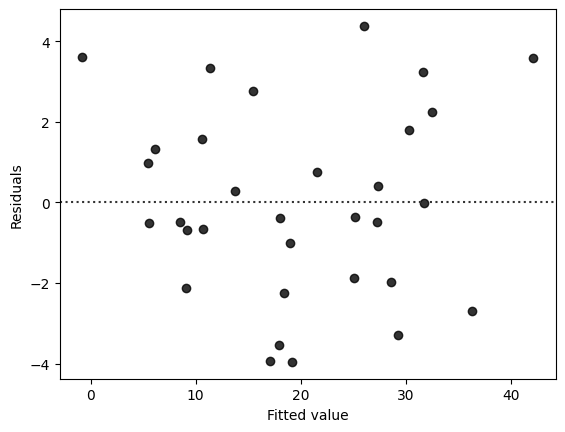

In [26]:
ax = sns.residplot(x=model.predict(gasol), y=gasol['Yield'], lowess=False, color='black')
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residuals')
plt.show()

### Partial Regression and Correlation

In [27]:
stage1 = smf.ols(formula='Yield ~ 1 + astm', data=gasol).fit()
print(stage1.params)
print('R2(y, astm)', stage1.rsquared)

Intercept    41.388571
astm         -0.089976
dtype: float64
R2(y, astm) 0.09924028202169999


In [28]:
stage2 = smf.ols(formula='endPt ~ 1 + astm', data=gasol).fit()
print(stage2.params)
print('R2(endPt, astm)', stage2.rsquared)

Intercept    147.104971
astm           0.765999
dtype: float64
R2(endPt, astm) 0.16994727072324556


In [29]:
residuals = pd.DataFrame({
  'e1': stage1.resid,
  'e2': stage2.resid,
})
print(np.corrcoef(stage1.resid, stage2.resid))

# use -1 in the formula to fix intercept to 0
stage3 = smf.ols(formula='e1 ~ e2 - 1', data=residuals).fit()
print(stage3.params)
print('R2(e1, e2)', stage3.rsquared)

[[1.         0.97306538]
 [0.97306538 1.        ]]
e2    0.155813
dtype: float64
R2(e1, e2) 0.946856231105354


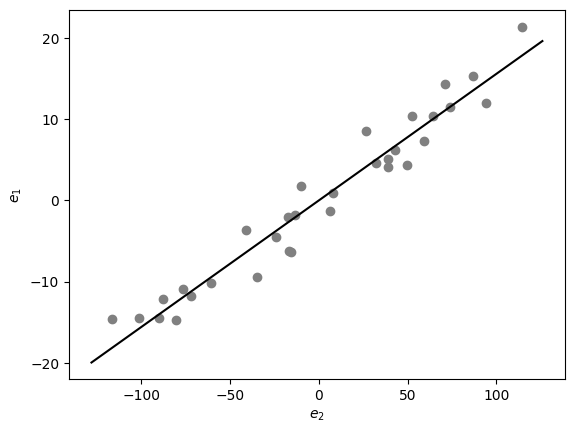

In [30]:
plt.scatter(stage2.resid, stage1.resid, color='grey')
ax = plt.gca()
ax.set_xlabel(r'$e_2$')
ax.set_ylabel(r'$e_1$')
xlim = np.array(ax.get_xlim())
ax.plot(xlim, stage3.params[0] * xlim, color='black')
plt.show()

### Multiple Linear Regression

In [31]:
almpin = mistat.load_data('ALMPIN')
# create the X matrix
X = almpin[['diam1', 'diam2', 'diam3']]
X = np.hstack((np.ones((len(X), 1)), X))
# calculate the inverse of XtX
np.linalg.inv(np.matmul(X.transpose(), X))

array([[5907.19803244, -658.62798454,  558.04560751, -490.70308614],
       [-658.62798438,  695.575527  , -448.14874871, -181.93582388],
       [ 558.04560759, -448.14874882,  739.77378704, -347.37983113],
       [-490.70308638, -181.93582375, -347.37983124,  578.76516931]])

In [32]:
almpin = mistat.load_data('ALMPIN')
model = smf.ols('capDiam ~ 1 + diam1 + diam2 + diam3', data=almpin).fit()
print(model.summary2())
print()
print(sms.anova.anova_lm(model))

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.874     
Dependent Variable: capDiam          AIC:                -496.9961 
Date:               2023-01-07 14:32 BIC:                -488.0021 
No. Observations:   70               Log-Likelihood:     252.50    
Df Model:           3                F-statistic:        159.9     
Df Residuals:       66               Prob (F-statistic): 3.29e-30  
R-squared:          0.879            Scale:              4.5707e-05
---------------------------------------------------------------------
               Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
Intercept      4.0411     0.5196   7.7771   0.0000    3.0037   5.0786
diam1          0.7555     0.1783   4.2371   0.0001    0.3995   1.1115
diam2          0.0173     0.1839   0.0939   0.9255   -0.3499   0.3844
diam3          0.3227     0.1626   1.9840   0.0514   -

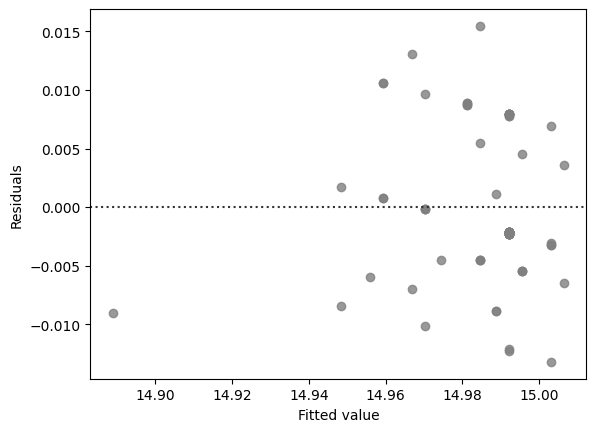

In [33]:
ax = sns.residplot(x=model.predict(almpin), y=almpin['capDiam'], lowess=False,
                   color='grey', line_kws={'color': 'black', 'linestyle': '--'})
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residuals')
plt.show()

In [34]:
# load dataset and split into data for US and Asia
car = mistat.load_data('CAR.csv')
car_US = car[car['origin'] == 1].copy()
car_Asia = car[car['origin'] == 3].copy()
# add the indicator variable z
car_US['z'] = 0
car_Asia['z'] = 1
# combine datasets and add variable w
car_combined = pd.concat([car_US, car_Asia])
car_combined['w'] = car_combined['z'] * car_combined['turn']

model_US = smf.ols('mpg ~ 1 + turn', data=car_US).fit()
model_Asia = smf.ols('mpg ~ 1 + turn', data=car_Asia).fit()
model_combined = smf.ols('mpg ~ 1 + turn+z+w', data=car_combined).fit()
model_simple = smf.ols('mpg ~ 1 + turn', data=car_combined).fit()
print('US\n', model_US.params)
print('Europe\n', model_Asia.params)
print(model_combined.summary2())

US
 Intercept    49.076922
turn         -0.756540
dtype: float64
Europe
 Intercept    42.086008
turn         -0.574288
dtype: float64
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.298   
Dependent Variable: mpg              AIC:                503.3067
Date:               2023-01-07 14:32 BIC:                513.5223
No. Observations:   95               Log-Likelihood:     -247.65 
Df Model:           3                F-statistic:        14.31   
Df Residuals:       91               Prob (F-statistic): 1.03e-07
R-squared:          0.320            Scale:              11.233  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    49.0769    5.3023   9.2557  0.0000   38.5445  59.6094
turn         -0.7565    0.1420  -5.3266  0.0000   -1.0387  -0.4744
z            -6.9909

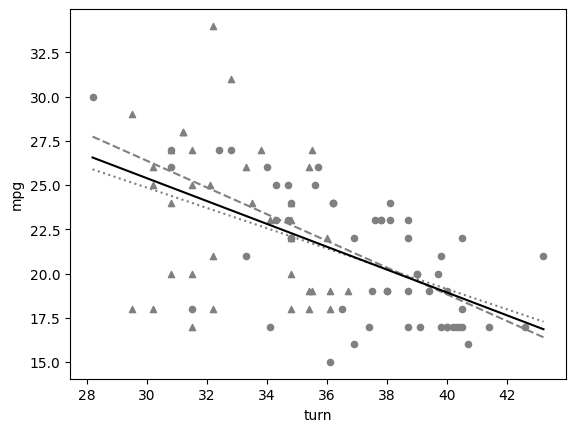

In [35]:
# create visualization
ax = car_US.plot.scatter(x='turn', y='mpg', color='gray', marker='o')
car_Asia.plot.scatter(x='turn', y='mpg', ax=ax, color='gray', marker='^')

car_combined = car_combined.sort_values(['turn'])
ax.plot(car_combined['turn'], model_US.predict(car_combined),
        color='gray', linestyle='--')
ax.plot(car_combined['turn'], model_Asia.predict(car_combined),
        color='gray', linestyle=':')
ax.plot(car_combined['turn'], model_simple.predict(car_combined),
        color='black', linestyle='-')
plt.show()


### Partial $F$-Tests and The Sequential SS

In [36]:
import warnings
almpin = mistat.load_data('ALMPIN')
model3 = smf.ols('capDiam ~ 1 + diam1+diam2+diam3', data=almpin).fit()
model2 = smf.ols('capDiam ~ 1 + diam1+diam2', data=almpin).fit()
model1 = smf.ols('capDiam ~ 1 + diam1', data=almpin).fit()
model0 = smf.ols('capDiam ~ 1', data=almpin).fit()

print('Full model\n', sms.anova.anova_lm(model))
print(f'SSE: diam1: {model1.ssr:.6f}')
print(f'     diam2: {model2.ssr:.6f}')
print(f'     diam3: {model3.ssr:.6f}')

# we capture a few irrelevant warnings here -
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print('diam1:\n', sms.anova.anova_lm(model0, model1))
    print('diam2:\n', sms.anova.anova_lm(model1, model2))
    print('diam3:\n', sms.anova.anova_lm(model2, model3))

Full model
             df    sum_sq   mean_sq           F        PR(>F)
diam1      1.0  0.021657  0.021657  473.822506  7.918133e-32
diam2      1.0  0.000084  0.000084    1.832486  1.804520e-01
diam3      1.0  0.000180  0.000180    3.936223  5.141819e-02
Residual  66.0  0.003017  0.000046         NaN           NaN
SSE: diam1: 0.003280
     diam2: 0.003197
     diam3: 0.003017
diam1:
    df_resid       ssr  df_diff   ss_diff           F        Pr(>F)
0      69.0  0.024937      0.0       NaN         NaN           NaN
1      68.0  0.003280      1.0  0.021657  448.941202  1.153676e-31
diam2:
    df_resid       ssr  df_diff   ss_diff        F    Pr(>F)
0      68.0  0.003280      0.0       NaN      NaN       NaN
1      67.0  0.003197      1.0  0.000084  1.75555  0.189682
diam3:
    df_resid       ssr  df_diff  ss_diff         F    Pr(>F)
0      67.0  0.003197      0.0      NaN       NaN       NaN
1      66.0  0.003017      1.0  0.00018  3.936223  0.051418


### Model Construction:  Step-Wise Regression

In [37]:
gasol = mistat.load_data('GASOL')
gasol = gasol.rename(columns={'yield': 'Yield'})

outcome = 'Yield'
all_vars = set(gasol.columns)
all_vars.remove(outcome)

include, model = mistat.stepwise_regression(outcome, all_vars, gasol)

formula = ' + '.join(include)
formula = f'{outcome} ~ 1 + {formula}'
print()
print('Final model')
print(formula)
print(model.params)

Step 1 add - (F: 30.76)  endPt
Step 2 add - (F: 270.11)  astm endPt
Step 3 add - (F: 4.72)  astm endPt x1

Final model
Yield ~ 1 + x1 + endPt + astm
Intercept    4.032034
x1           0.221727
endPt        0.156527
astm        -0.186571
dtype: float64


### Regression Diagnostics

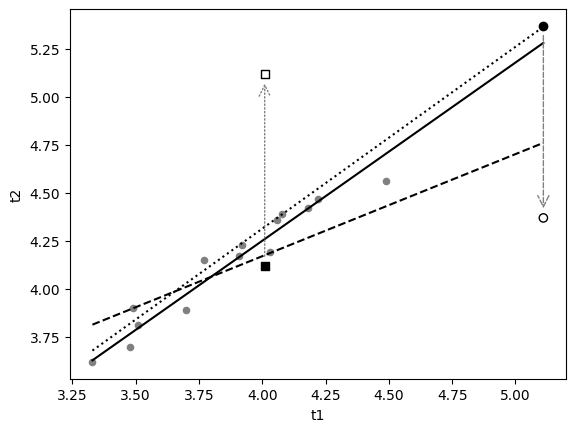

In [38]:
# load data and create modified dataset
socell = mistat.load_data('SOCELL')
socell = socell.sort_values(['t1'])
socell1 = socell.copy()
t1_1 = socell1.loc[8, 't1']
t2_1 = socell1.loc[8, 't2']
socell1.loc[8, 't2'] = t2_1 - 1

socell2 = socell.copy()
t1_2 = socell2.loc[5, 't1']
t2_2 = socell2.loc[5, 't2']
socell2.loc[5, 't2'] = t2_2 + 1

model = smf.ols('t2 ~ 1 + t1', data=socell).fit()
model1 = smf.ols('t2 ~ 1 + t1', data=socell1).fit()
model2 = smf.ols('t2 ~ 1 + t1', data=socell2).fit()

ax = socell.plot.scatter(x='t1', y='t2', color='grey')
ax.plot(socell['t1'], model.predict(socell), color='black')
ax.plot(socell['t1'], model1.predict(socell), color='black', linestyle='--')
ax.plot(socell['t1'], model2.predict(socell), color='black', linestyle=':')

prop = {'arrowstyle': "->,head_width=0.4,head_length=0.8",
        'shrinkA': 0, 'shrinkB': 0, 'color': 'grey', 'linewidth': 1}
d = 0.05
ax.scatter([t1_1], [t2_1], color='black')
ax.scatter([t1_1], [t2_1-1], facecolors='none', edgecolors='black')
plt.annotate("", xytext=(t1_1, t2_1-d), xy=(t1_1, t2_1-1+d),
       arrowprops={'linestyle': '--', **prop})
ax.scatter([t1_2], [t2_2], color='black', marker='s')
ax.scatter([t1_2], [t2_2+1], facecolors='none', edgecolors='black', marker='s')
plt.annotate("", xytext=(t1_2, t2_2+d), xy=(t1_2, t2_2+1-d),
       arrowprops={'linestyle': ':', **prop})
plt.show()

In [39]:
socell = mistat.load_data('SOCELL')

model = smf.ols(formula='t2 ~ 1 + t1', data=socell).fit()
influence = model.get_influence()
# leverage: influence.hat_matrix_diag
# std. residuals: influence.resid_studentized
# Cook-s distance: influence.cooks_distance[0]
# DFIT: influence.dffits[0]

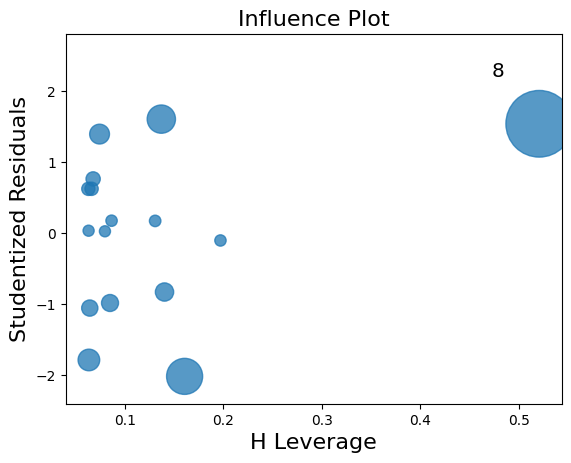

In [40]:
sm.graphics.influence_plot(model)
ax = plt.gca()
ax.set_ylim(-2.4, 2.8)
plt.show()

In [41]:
leverage = influence.hat_matrix_diag
print(f'average leverage: {np.mean(leverage):.3f}')
print(f'point #8: {leverage[8]:.3f}')
print(f'point #5: {leverage[5]:.3f}')

average leverage: 0.125
point #8: 0.521
point #5: 0.064


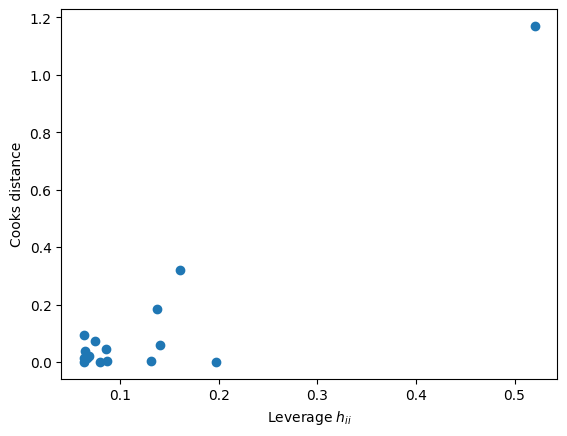

In [42]:
influence = model.get_influence()
plt.scatter(influence.hat_matrix_diag, influence.summary_frame()['cooks_d'])
ax = plt.gca()
ax.set_xlabel('Leverage $h_{ii}$')
ax.set_ylabel('Cook''s distance')
plt.show()

## Quantal Response Analysis:  Logistic Regression

## The Analysis of Variance:  The Comparison of Means

### The Statistical Model

### The One-Way Analysis of Variance (ANOVA)

In [43]:
vendor = mistat.load_data('VENDOR')
vendor_long = pd.melt(vendor, value_vars=vendor.columns)
vendor_long['value'] = np.sqrt(vendor_long['value'])

                            0           1
variable[vendor1]   58.000928   84.123334
variable[vendor2]   91.546689  117.669096
variable[vendor3]  104.114252  130.236658
variable[vendor1]    13.061203
variable[vendor2]    13.061203
variable[vendor3]    13.061203
dtype: float64


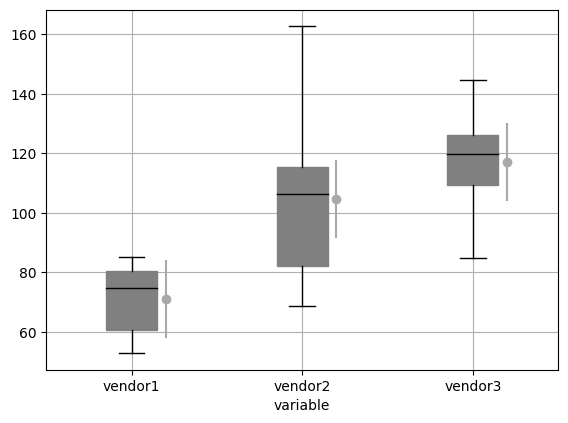

In [44]:
ax = vendor_long.boxplot(column='value', by='variable',
                    color={'boxes': 'grey', 'medians': 'black', 'whiskers': 'black'},
                    patch_artist=True)
ax.set_title('')
ax.get_figure().suptitle('')
model = smf.ols('value ~ -1 + variable', data=vendor_long).fit()
ci = model.conf_int()
print(ci)
err = 0.5 * (ci[1] - ci[0])
print(err)
#err = model.conf_int().transpose().values - model.params
# print(err)
ax.errorbar([1.2, 2.2, 3.2], model.params, yerr=err,
  fmt='o', color='darkgrey')
plt.show()

In [45]:
model = smf.ols('value ~ variable', data=vendor_long).fit()
table = sm.stats.anova_lm(model, typ=1)
print(table)

            df        sum_sq      mean_sq          F    PR(>F)
variable   2.0  11365.667752  5682.833876  14.024312  0.000067
Residual  27.0  10940.751619   405.213023        NaN       NaN


In [46]:
model = smf.ols('value ~ -1 + variable', data=vendor_long).fit()
print(model.conf_int())

                            0           1
variable[vendor1]   58.000928   84.123334
variable[vendor2]   91.546689  117.669096
variable[vendor3]  104.114252  130.236658


## Simultaneous Confidence Intervals:  Multiple Comparisons

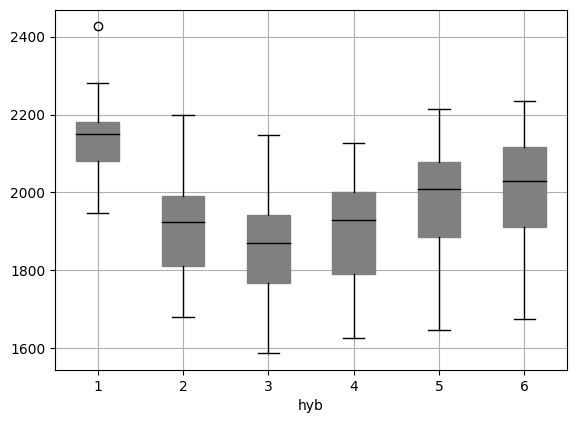

In [47]:
hadpas = mistat.load_data('HADPAS')
ax = hadpas.boxplot(column='res3', by='hyb',
                    color={'boxes': 'grey', 'medians': 'black', 'whiskers': 'black'},
                    patch_artist=True)
ax.set_title('')
ax.get_figure().suptitle('')
ax.set_xlabel('hyb')
plt.show()

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hadpas = mistat.load_data('HADPAS')
mod = pairwise_tukeyhsd(hadpas['res3'], hadpas['hyb'])
print(mod)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2 -240.5938    0.0 -336.8754 -144.3121   True
     1      3 -293.0625    0.0 -389.3442 -196.7808   True
     1      4    -243.0    0.0 -339.2817 -146.7183   True
     1      5 -162.8438    0.0 -259.1254  -66.5621   True
     1      6    -129.5  0.002 -225.7817  -33.2183   True
     2      3  -52.4688 0.6198 -148.7504   43.8129  False
     2      4   -2.4062    1.0  -98.6879   93.8754  False
     2      5     77.75 0.1892  -18.5317  174.0317  False
     2      6  111.0938 0.0135   14.8121  207.3754   True
     3      4   50.0625 0.6664  -46.2192  146.3442  False
     3      5  130.2188 0.0019   33.9371  226.5004   True
     3      6  163.5625    0.0   67.2808  259.8442   True
     4      5   80.1562 0.1625  -16.1254  176.4379  False
     4      6     113.5 0.0107   17.2183  209.7817   True
     5      6 

## Contingency Tables

### The Structure of Contingency Tables

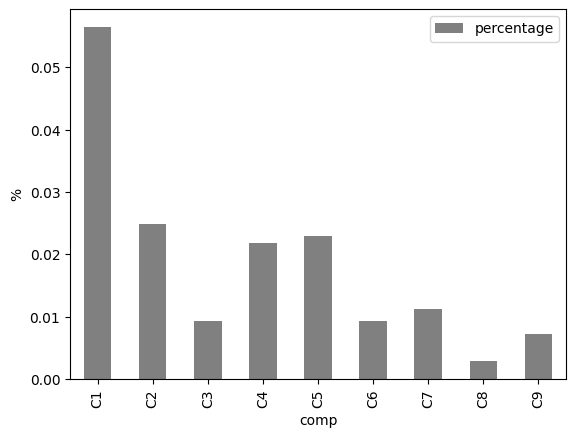

In [49]:
insertion = mistat.load_data('INSERTION')
insertion['percentage'] = 100 * insertion['fail'] / (insertion['fail']+insertion['succ'])
ax = insertion.plot.bar(x='comp', y='percentage', color='grey')
ax.set_ylabel('%')
plt.show()

In [50]:
car = mistat.load_data('CAR')
count_table = car[['cyl', 'origin']].pivot_table(
             index='cyl', columns='origin', aggfunc=len, fill_value=0)
print(count_table)

origin   1  2   3
cyl              
4       33  7  26
6       13  7  10
8       12  0   1


### Indices of Association For Contingency Tables

#### Two Interval Scaled Variables

In [51]:
# create binned data set
bins_turn = np.array([27, 30.6, 34.2, 37.8, car['turn'].max()])
bins_mpg = np.array([12, 18, 24, car['mpg'].max()])
binned_car = pd.DataFrame({
  'turn': pd.cut(car['turn'], bins=bins_turn),
  'mpg': pd.cut(car['mpg'], bins=(12,18,24,car['mpg'].max())),
})
# calculate proportional frequency and marginals
freqDist = pd.crosstab(binned_car['turn'], binned_car['mpg'])
pij = freqDist/len(car)
p_mpg = np.sum(pij, axis=0)
p_turn = np.sum(pij, axis=1)

# calculate average turn and mpg
center_turn = 0.5 * (bins_turn[1:] + bins_turn[:-1])
center_mpg = 0.5 * (bins_mpg[1:] + bins_mpg[:-1])
mean_turn = np.sum(center_turn * p_turn)
mean_mpg = np.sum(center_mpg * p_mpg)

# calculate estimate of coefficient of correlation
rho1 = np.sum((pij.values * np.outer(center_turn - mean_turn,
                                     center_mpg - mean_mpg)))
rho2a = np.sqrt(np.sum(p_turn*(center_turn-mean_turn)**2))
rho2b = np.sqrt(np.sum(p_mpg*(center_mpg-mean_mpg)**2))
rho = rho1 / (rho2a * rho2b)
print(f"r_XY   {np.corrcoef(car['turn'], car['mpg'])[0][1]:.3f}")
print(f'rho_XY {rho:.3f}')

r_XY   -0.541
rho_XY -0.472


#### Indices of Association for Categorical Variables

In [52]:
chi2 = stats.chi2_contingency(count_table)
print(f'chi2 statistic {chi2[0]:.2f}')

chi2 statistic 12.13


## Categorical Data Analysis

### Comparison of Binomial Experiments

In [53]:
df = pd.DataFrame({
  'i': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'Ji': [61, 34, 10, 23, 25, 9, 12, 3, 13],
  'ni': [108119,136640,107338,105065,108854,96873,107391,105854,180630],
  })
df['Yi'] = 2*np.arcsin(np.sqrt((df['Ji'] + 3/8)/(df['ni'] + 3/4)))

In [54]:
Ybar = np.sum(df['ni'] * df['Yi']) / np.sum(df['ni'])
Q = np.sum(df['ni'] * (df['Yi'] - Ybar) ** 2)
print(Q)

105.43139783460373


In [55]:
stats.chi2.cdf(105.43, df=8)

1.0

## Chapter Highlights

## Exercises